# Yes, we have data, a lot of it actually. But I really can't go through it manually, but there seems to be a pattern.
Data is growing exponentially now-a-days. Computer Scientists and Professors around the globe, devised algorithms that can quickly provide insights and predict something precisely by leveraging the sophisticated hardware that is cheap as chips.

These algorithms, that can teach the machine to learn, are called machine learning algorithms. Let's look at this graph, lay down some principles and get familiar with some terminology

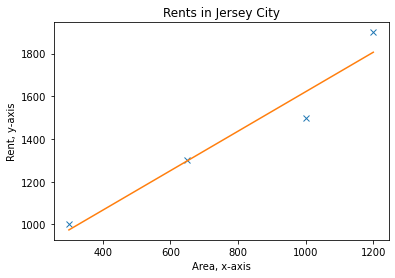

In [1]:
import numpy as np
import matplotlib.pyplot as plt
house_area = np.array([300, 650, 1000, 1200])
rent = np.array([ 1000, 1300, 1500, 1900 ])

plt.plot(house_area, rent, 'x')
plt.title('Rents in Jersey City')
plt.xlabel('Area, x-axis')
plt.ylabel('Rent, y-axis')
slope, intercept = np.polyfit(house_area, rent, 1)

# y = mx + c is a first degree polynomial or a linear equation
plt.plot(house_area, slope*house_area + intercept)
plt.show()

In [3]:
# Run the cell above to get slope and intercept
predict_rent = lambda area: slope * area + intercept

predict_rent(400)

1066.7549668874171

Predict rent for a house of area 990 sqft

In [12]:
# Add your code here

Assume that there are no other factors that influence the rent other than the area of the house.
### Why is the 990 sqft more than 1000 sqft?
let's promote our equation to next degree. A second degree polynomial can be represented by the equation $$y = ax^2 + bx + c$$

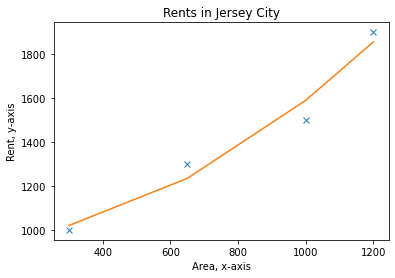

In [23]:
a_2, b_2, c_2 = np.polyfit(house_area, rent, 2)

plt.plot(house_area, rent, 'x')
plt.title('Rents in Jersey City')
plt.xlabel('Area, x-axis')
plt.ylabel('Rent, y-axis')

plt.plot(house_area, a_2*(house_area**2) + b_2*house_area + c_2)
plt.show()

In [24]:
predict_rent_2 = lambda area: a_2*(area**2) + b_2*area + c_2

predict_rent_2(990)

1577.6586457750436

Let's compare both the models

In [27]:
# calculate difference between rent-predictions of 990 sqft house by model 1 and 2

The second degree model had the flexibility and predicted closer to what we are expecting. But we want to save more money and yes the model can be improved.
### As curious as Curious George?
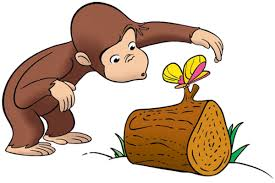

Want to go for a 3rd degree polynomial? What are you waiting for? start coding! $$y = ax^3 + bx^2 + cx + d$$

In [15]:
# 5 minutes
# your code here
# plot and write the lambda function to predict